In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Basic subplots

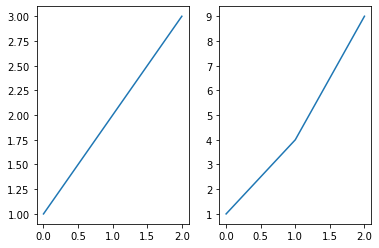

In [3]:
fig = plt.figure(2)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(data)
ax2.plot(x, data2)

plt.show()

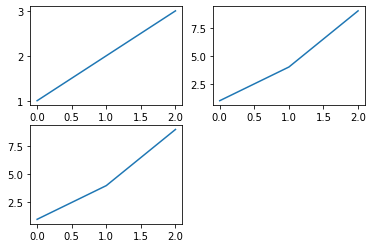

In [4]:
fig = plt.figure(3)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax.plot(x, data)
ax2.plot(x, data2)
ax3.plot(x, data2)

plt.show()

In [5]:
housing_raw = pd.read_csv('data/housing_data.csv',
                          parse_dates=['period_begin', 'period_end'],
                          dtype = {'total_homes_sold':"Int32", 'region_name':'category'})

In [8]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


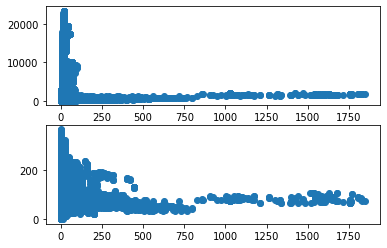

In [13]:
fig, ax = plt.subplots(2, 1)

ax[0].scatter(housing_raw.loc[:, 'months_of_supply'], housing_raw.loc[:, 'inventory'])
ax[1].scatter(housing_raw.loc[:, 'months_of_supply'], housing_raw.loc[:, 'age_of_inventory'])